# SALARIO MÉDIO DOS PROFISSIONAIS DE DADOS

***

# LIB'S

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# HELPER FUNCTIONS

In [2]:
def grafico(data, col, t1, t2, t3, t4):
    
    plt.figure(figsize = (t1, t2))
    p = 1
    
    for f in df[col].unique():
        
            plt.subplot(t3, t4, p)
            
            aux = pd.DataFrame(df[df[col] == f]['salario'].value_counts())
            ax = sns.barplot(data = aux,
                  x = aux.index, y = 'salario', color = 'steelblue')
            plt.title(f)
            plt.xticks(rotation = 90)
            plt.tight_layout()
            
            for t, label in zip(ax.patches,round(pd.DataFrame(df[df['genero'] == f]['salario'].value_counts(normalize = True) * 100),2)['salario'].values):
                ax.annotate(label, (t.get_x() + 0.375, t.get_height() + 0.15))

            
            p += 1
            

# DATASET

In [3]:
df = pd.read_csv('../SalarioMedioProfissionaisDados.csv', sep = ',', encoding = 'utf-8')

In [4]:
df.shape

(473, 11)

In [5]:
df.head()

,Carimbo de data/hora,Em qual estado você reside?,Com qual gênero você se identifica?,Como você se auto-declara em relação a etnia/raça?,Faz parte da comunidade LGBTQIA+ ?,Qual sua formação atual?,Qual sua ocupação atual?,Qual sua faixa de salário bruto?,Qual seu modelo de trabalho?,"Em geral, quantos colaboradores há na empresa que você trabalha?",Qual o setor da empresa que você trabalha?
0,2021/07/27 11:42:40 AM GMT-3,São Paulo,Mulher,Pessoa branca,Sim,Pós Graduação cursando/completo,Especialista,"R$5.000,01 a R$7.000,00",CLT,Acima de 1001,Comério / Varejo
1,2021/07/27 11:51:27 AM GMT-3,São Paulo,Homem,Pessoa preta ou negra,Não,Bacharelado/Tecnólogo/Licenciatura completo,Analista,"R$5.000,01 a R$7.000,00",CLT,Acima de 1001,Tecnologia
2,2021/07/27 11:52:14 AM GMT-3,Sergipe,Mulher,Pessoa parda,Não,Pós Graduação cursando/completo,Analista,"R$2.000,01 a R$3.000,00",CLT,101 - 500,Outros
3,2021/07/27 11:53:02 AM GMT-3,Distrito Federal,Homem,Pessoa parda,Não,Pós Graduação cursando/completo,Analista,"7.000,01 a R$10.000,00",CLT,Acima de 1001,Bancos
4,2021/07/27 11:54:17 AM GMT-3,Amazonas,Mulher,Pessoa branca,Não,Mestrado/Doutorado cursando/completo,Analista,"R$5.000,01 a R$7.000,00",CLT,101 - 500,Comério / Varejo


# TRATAMENTO DOS DADOS

In [6]:
# renomeando as colunas
cols = ['data', 'uf', 'genero', 'etnia', 'lgbtqia', 'formacao', 'ocupacao', 'salario',
       'model_trab', 'colab', 'setor']

df.columns = cols

In [7]:
# valores nulos
df.isna().sum()

data           0
uf            27
genero         1
etnia          2
lgbtqia        3
formacao       1
ocupacao       1
salario        2
model_trab     3
colab          1
setor          3
dtype: int64

In [8]:
# preenchendo nulo da variavel ref a salario
df['salario'] = df['salario'].fillna('0')

In [9]:
# Preenchendo as demais variáveis
df.fillna('NA', inplace = True)

In [10]:
# Substituindo caracteres (melhorar visualizacao)
df['salario'] = df['salario'].apply(lambda x: x.replace('R$', ''))

In [11]:
df['ocupacao'].value_counts()

Analista                       301
Especialista                    83
Jovem Aprendiz / Estagiário     25
Coordenador                     19
Auxiliar/Assistente             10
Gerente                          6
Consultor                        5
Trainee                          4
Diretor                          2
Engenheiro de Dados              2
Engenheiro                       1
Supervisor                       1
Eng de Dados                     1
Cientista de Dados               1
Estagiário                       1
Dba pleno                        1
Cientista de dados               1
Engenheira                       1
Junior                           1
Engenheiro de dados              1
Engemheiro de dados              1
Consultor De BI                  1
Cientista                        1
NA                               1
Tech Lead                        1
Júnior                           1
Name: ocupacao, dtype: int64

In [12]:
df['ocupacao'] = df['ocupacao'].apply(lambda x: x.title())

In [13]:
df['ocupacao'].value_counts()

Analista                       301
Especialista                    83
Jovem Aprendiz / Estagiário     25
Coordenador                     19
Auxiliar/Assistente             10
Gerente                          6
Consultor                        5
Trainee                          4
Diretor                          2
Engenheiro De Dados              2
Engenheiro                       1
Supervisor                       1
Eng De Dados                     1
Cientista De Dados               1
Estagiário                       1
Dba Pleno                        1
Cientista De Dados               1
Engenheira                       1
Junior                           1
Engenheiro De Dados              1
Engemheiro De Dados              1
Consultor De Bi                  1
Cientista                        1
Na                               1
Tech Lead                        1
Júnior                           1
Name: ocupacao, dtype: int64

# ANÁLISE EXPLORATÓRIA DE DADOS

### QUANTIDADE

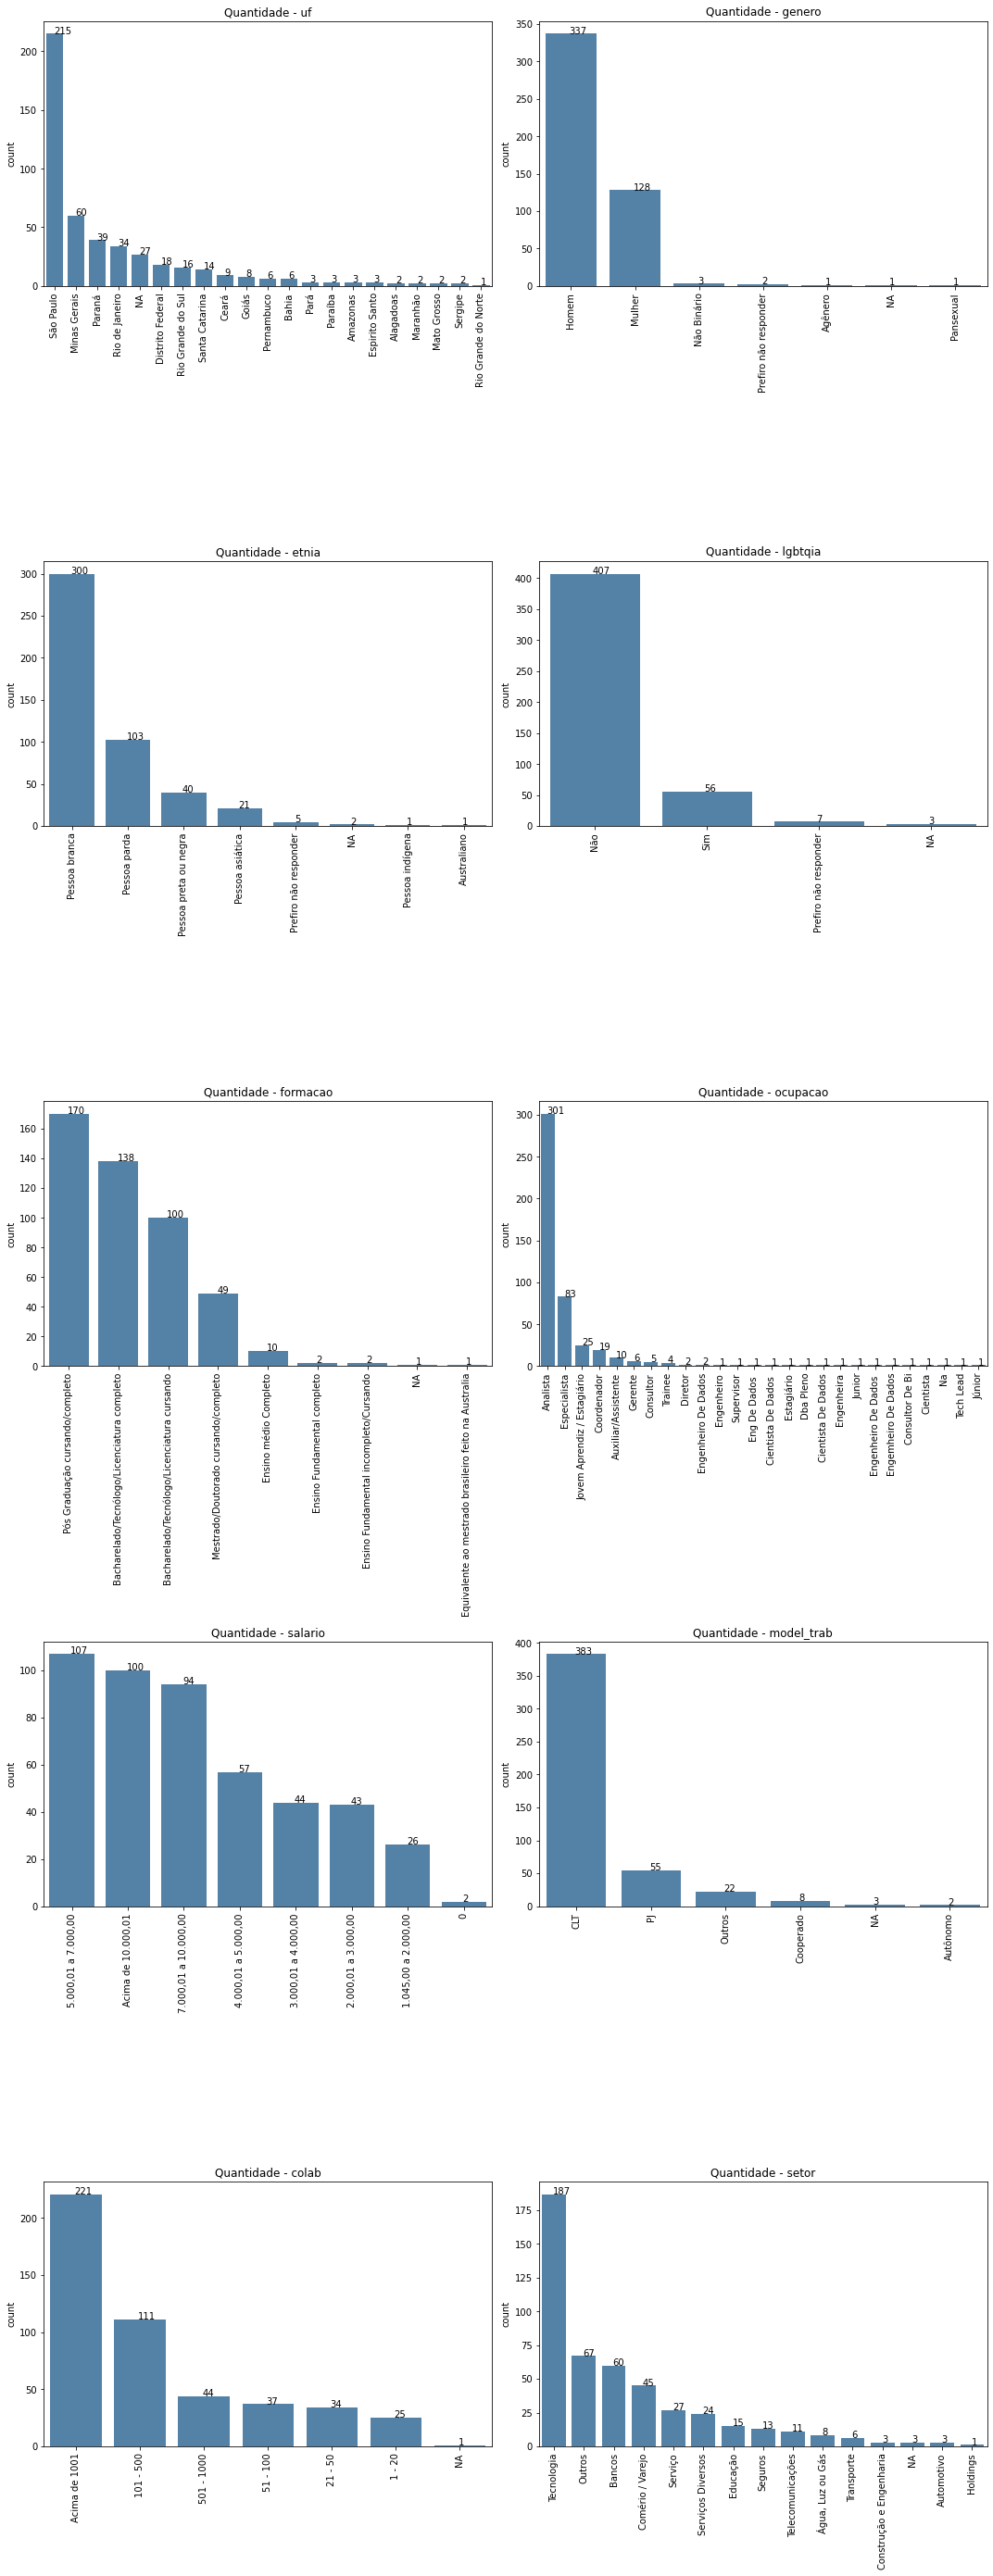

In [14]:
plt.figure(figsize = (15, 45))
x = 1

for f in df.columns:
    if f != 'data':
    
        plt.subplot( 6, 2, x)
        
        order = df[f].value_counts().index
        ax = sns.countplot(data = df, x = f, color = 'steelblue', order = order)
        plt.title('Quantidade - {}'.format(f))
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.xlabel(None)
        
        for p, label in zip(ax.patches, df[f].value_counts().values):
            ax.annotate(label, (p.get_x() + 0.375, p.get_height() + 0.15))
        
        x += 1

### PERCENTUAL

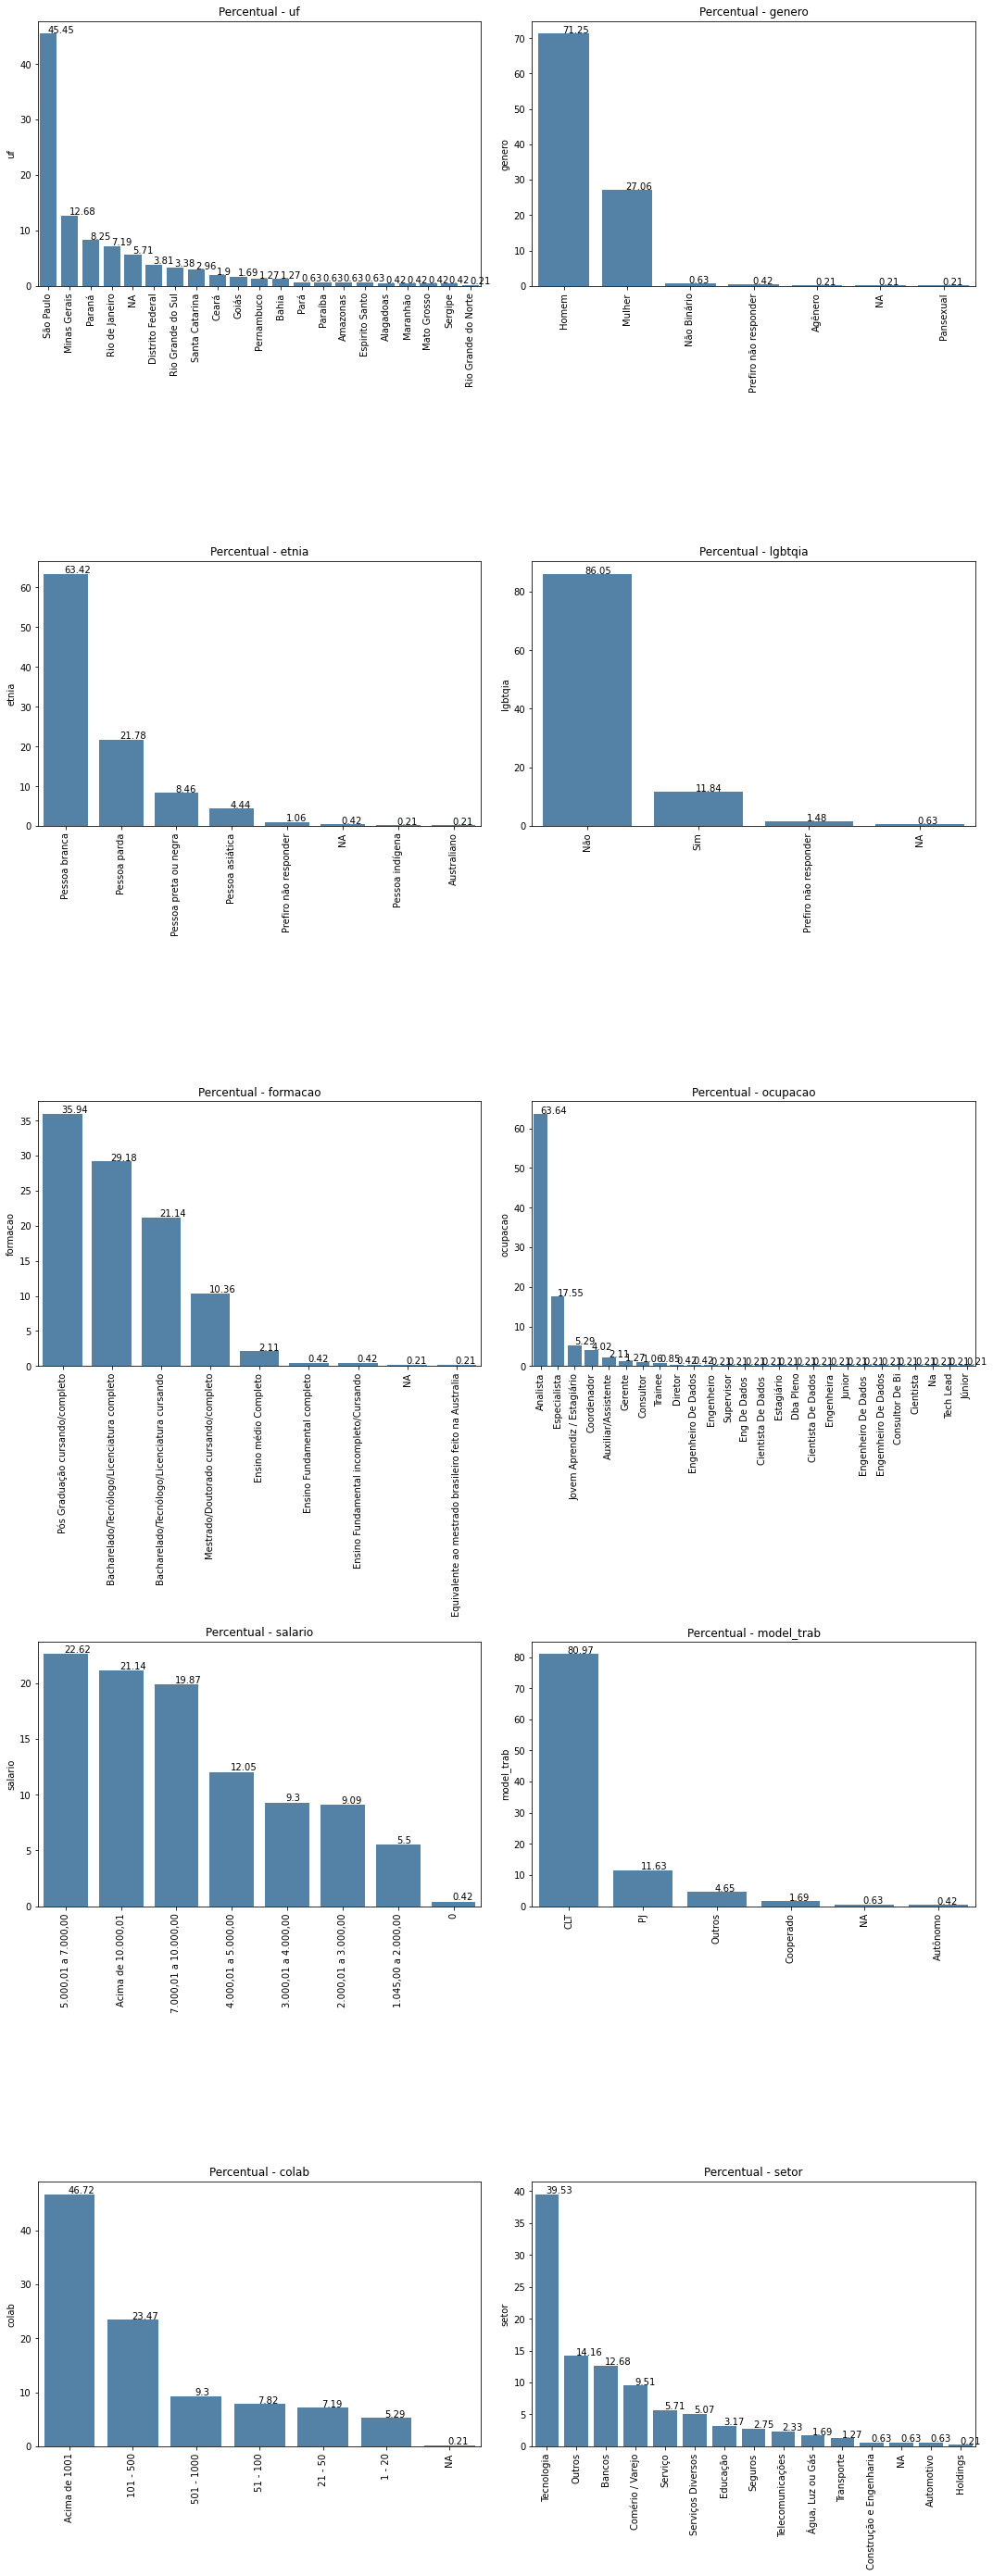

In [15]:
plt.figure(figsize = (15, 45))
x = 1

for f in df.columns:
    if f != 'data':
    
        plt.subplot( 6, 2, x)
        
        order = df[f].value_counts(normalize = True).index
        aux = pd.DataFrame(df[f].value_counts(normalize = True) * 100)
        ax = sns.barplot(data = aux, x = aux.index, y = f, color = 'steelblue', order = order)
        plt.title('Percentual - {}'.format(f))
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.xlabel(None)
        
        for p, label in zip(ax.patches, round((df[f].value_counts(normalize = True) *100) ,2).values):
            ax.annotate(label, (p.get_x() + 0.375, p.get_height() + 0.15))
        
        x += 1

# ANÁLISE SALÁRIAL

## GÊNERO

In [16]:
qt = df['genero'].value_counts()
perc = df['genero'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Homem,337,71.247357
Mulher,128,27.061311
Não Binário,3,0.634249
Prefiro não responder,2,0.422833
Agênero,1,0.211416
NA,1,0.211416
Pansexual,1,0.211416


In [17]:
pd.DataFrame(df[['genero', 'salario']].value_counts()).sort_values(by=['genero', 0], ascending = False)

0
genero                salario                 
Prefiro não responder Acima de 10.000,01     2
Pansexual             Acima de 10.000,01     1
Não Binário           5.000,01 a 7.000,00    1
                      7.000,01 a 10.000,00   1
                      Acima de 10.000,01     1
NA                    0                      1
Mulher                5.000,01 a 7.000,00   39
                      7.000,01 a 10.000,00  20
                      4.000,01 a 5.000,00   16
                      3.000,01 a 4.000,00   15
                      Acima de 10.000,01    15
                      2.000,01 a 3.000,00   14
                      1.045,00 a 2.000,00    8
                      0                      1
Homem                 Acima de 10.000,01    81
                      7.000,01 a 10.000,00  73
                      5.000,01 a 7.000,00   66
                      4.000,01 a 5.000,00   41
                      2.000,01 a 3.000,00   29
                      3.000,01 a 4.000,00   29
                      1.045,00 a 2.000,00   18
Agênero               5.000,01 a 7.000,00    1

In [18]:
pd.DataFrame(df[df['genero'] == 'Homem']['salario'].value_counts()).rename(columns=({'salario' : 'qt'}))

,qt
"Acima de 10.000,01",81
"7.000,01 a 10.000,00",73
"5.000,01 a 7.000,00",66
"4.000,01 a 5.000,00",41
"2.000,01 a 3.000,00",29
"3.000,01 a 4.000,00",29
"1.045,00 a 2.000,00",18


In [19]:
qt = df[df['genero'] == 'Homem']['salario'].value_counts()
perc = df[df['genero'] == 'Homem']['salario'].value_counts(normalize = True) * 100

print("\nGênero : 'Homem'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Gênero : 'Homem'


,qtde,perc
"Acima de 10.000,01",81,24.035608
"7.000,01 a 10.000,00",73,21.661721
"5.000,01 a 7.000,00",66,19.584570
"4.000,01 a 5.000,00",41,12.166172
"2.000,01 a 3.000,00",29,8.605341
"3.000,01 a 4.000,00",29,8.605341
"1.045,00 a 2.000,00",18,5.341246


In [20]:
qt = df[df['genero'] == 'Mulher']['salario'].value_counts()
perc = df[df['genero'] == 'Mulher']['salario'].value_counts(normalize = True) * 100

print("\nGênero : 'Mulher'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Gênero : 'Mulher'


,qtde,perc
"5.000,01 a 7.000,00",39,30.46875
"7.000,01 a 10.000,00",20,15.62500
"4.000,01 a 5.000,00",16,12.50000
"3.000,01 a 4.000,00",15,11.71875
"Acima de 10.000,01",15,11.71875
"2.000,01 a 3.000,00",14,10.93750
"1.045,00 a 2.000,00",8,6.25000
0,1,0.78125


## ETNIA

In [21]:
qt = df['etnia'].value_counts()
perc = df['etnia'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Pessoa branca,300,63.424947
Pessoa parda,103,21.775899
Pessoa preta ou negra,40,8.456660
Pessoa asiática,21,4.439746
Prefiro não responder,5,1.057082
NA,2,0.422833
Pessoa indígena,1,0.211416
Australiano,1,0.211416


In [22]:
pd.DataFrame(df[['etnia', 'salario']].value_counts()).sort_values(by=['etnia', 0], ascending = False)

0
etnia                 salario                 
Prefiro não responder Acima de 10.000,01     2
                      1.045,00 a 2.000,00    1
                      5.000,01 a 7.000,00    1
                      7.000,01 a 10.000,00   1
Pessoa preta ou negra Acima de 10.000,01    12
                      7.000,01 a 10.000,00  12
                      5.000,01 a 7.000,00    5
                      4.000,01 a 5.000,00    4
                      2.000,01 a 3.000,00    4
                      3.000,01 a 4.000,00    2
                      1.045,00 a 2.000,00    1
Pessoa parda          Acima de 10.000,01    25
                      5.000,01 a 7.000,00   19
                      7.000,01 a 10.000,00  17
                      3.000,01 a 4.000,00   14
                      4.000,01 a 5.000,00   12
                      2.000,01 a 3.000,00   12
                      1.045,00 a 2.000,00    4
Pessoa indígena       5.000,01 a 7.000,00    1
Pessoa branca         5.000,01 a 7.000,00   75
                      7.000,01 a 10.000,00  60
                      Acima de 10.000,01    54
                      4.000,01 a 5.000,00   39
                      3.000,01 a 4.000,00   27
                      2.000,01 a 3.000,00   26
                      1.045,00 a 2.000,00   18
                      0                      1
Pessoa asiática       Acima de 10.000,01     6
                      5.000,01 a 7.000,00    6
                      7.000,01 a 10.000,00   4
                      4.000,01 a 5.000,00    2
                      3.000,01 a 4.000,00    1
                      2.000,01 a 3.000,00    1
                      1.045,00 a 2.000,00    1
NA                    0                      1
                      1.045,00 a 2.000,00    1
Australiano           Acima de 10.000,01     1

In [23]:
qt = df[df['etnia'] == 'Pessoa branca']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa branca']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa branca'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa branca'


,qtde,perc
"5.000,01 a 7.000,00",75,25.000000
"7.000,01 a 10.000,00",60,20.000000
"Acima de 10.000,01",54,18.000000
"4.000,01 a 5.000,00",39,13.000000
"3.000,01 a 4.000,00",27,9.000000
"2.000,01 a 3.000,00",26,8.666667
"1.045,00 a 2.000,00",18,6.000000
0,1,0.333333


In [24]:
qt = df[df['etnia'] == 'Pessoa parda']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa parda']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa parda'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa parda'


,qtde,perc
"Acima de 10.000,01",25,24.271845
"5.000,01 a 7.000,00",19,18.446602
"7.000,01 a 10.000,00",17,16.504854
"3.000,01 a 4.000,00",14,13.592233
"2.000,01 a 3.000,00",12,11.650485
"4.000,01 a 5.000,00",12,11.650485
"1.045,00 a 2.000,00",4,3.883495


In [25]:
qt = df[df['etnia'] == 'Pessoa preta ou negra']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa preta ou negra']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa preta ou negra'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa preta ou negra'


,qtde,perc
"7.000,01 a 10.000,00",12,30.0
"Acima de 10.000,01",12,30.0
"5.000,01 a 7.000,00",5,12.5
"4.000,01 a 5.000,00",4,10.0
"2.000,01 a 3.000,00",4,10.0
"3.000,01 a 4.000,00",2,5.0
"1.045,00 a 2.000,00",1,2.5


In [26]:
qt = df[df['etnia'] == 'Pessoa asiática']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa asiática']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa asiática'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa asiática'


,qtde,perc
"5.000,01 a 7.000,00",6,28.571429
"Acima de 10.000,01",6,28.571429
"7.000,01 a 10.000,00",4,19.047619
"4.000,01 a 5.000,00",2,9.523810
"2.000,01 a 3.000,00",1,4.761905
"3.000,01 a 4.000,00",1,4.761905
"1.045,00 a 2.000,00",1,4.761905


## ORIENTAÇÃO SEXUAL

In [27]:
qt = df['lgbtqia'].value_counts()
perc = df['lgbtqia'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Não,407,86.046512
Sim,56,11.839323
Prefiro não responder,7,1.479915
NA,3,0.634249


In [28]:
pd.DataFrame(df[['lgbtqia', 'salario']].value_counts()).sort_values(by=['lgbtqia', 0], ascending = False)

0
lgbtqia               salario                 
Sim                   5.000,01 a 7.000,00   13
                      7.000,01 a 10.000,00  11
                      4.000,01 a 5.000,00    9
                      2.000,01 a 3.000,00    8
                      Acima de 10.000,01     7
                      1.045,00 a 2.000,00    4
                      3.000,01 a 4.000,00    4
Prefiro não responder Acima de 10.000,01     4
                      2.000,01 a 3.000,00    2
                      1.045,00 a 2.000,00    1
Não                   5.000,01 a 7.000,00   93
                      Acima de 10.000,01    89
                      7.000,01 a 10.000,00  83
                      4.000,01 a 5.000,00   48
                      3.000,01 a 4.000,00   40
                      2.000,01 a 3.000,00   33
                      1.045,00 a 2.000,00   20
                      0                      1
NA                    1.045,00 a 2.000,00    1
                      5.000,01 a 7.000,00    1
                      0                      1

In [29]:
qt = df[df['lgbtqia'] == 'Não']['salario'].value_counts()
perc = df[df['lgbtqia'] == 'Não']['salario'].value_counts(normalize = True) * 100

print("\n LGBTQIA+ : 'Não'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 LGBTQIA+ : 'Não'


,qtde,perc
"5.000,01 a 7.000,00",93,22.850123
"Acima de 10.000,01",89,21.867322
"7.000,01 a 10.000,00",83,20.393120
"4.000,01 a 5.000,00",48,11.793612
"3.000,01 a 4.000,00",40,9.828010
"2.000,01 a 3.000,00",33,8.108108
"1.045,00 a 2.000,00",20,4.914005
0,1,0.245700


In [30]:
qt = df[df['lgbtqia'] == 'Sim']['salario'].value_counts()
perc = df[df['lgbtqia'] == 'Sim']['salario'].value_counts(normalize = True) * 100

print("\n LGBTQIA+ : 'Sim'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 LGBTQIA+ : 'Sim'


,qtde,perc
"5.000,01 a 7.000,00",13,23.214286
"7.000,01 a 10.000,00",11,19.642857
"4.000,01 a 5.000,00",9,16.071429
"2.000,01 a 3.000,00",8,14.285714
"Acima de 10.000,01",7,12.500000
"1.045,00 a 2.000,00",4,7.142857
"3.000,01 a 4.000,00",4,7.142857


## FORMAÇÃO

In [31]:
qt = df['formacao'].value_counts()
perc = df['formacao'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Pós Graduação cursando/completo,170,35.940803
Bacharelado/Tecnólogo/Licenciatura completo,138,29.175476
Bacharelado/Tecnólogo/Licenciatura cursando,100,21.141649
Mestrado/Doutorado cursando/completo,49,10.359408
Ensino médio Completo,10,2.114165
Ensino Fundamental completo,2,0.422833
Ensino Fundamental incompleto/Cursando,2,0.422833
NA,1,0.211416
Equivalente ao mestrado brasileiro feito na Australia,1,0.211416


In [32]:
pd.DataFrame(df[['formacao', 'salario']].value_counts()).sort_values(by=['formacao', 0], ascending = False)

0
formacao                                           salario                 
Pós Graduação cursando/completo                    Acima de 10.000,01    49
                                                   5.000,01 a 7.000,00   42
                                                   7.000,01 a 10.000,00  32
                                                   4.000,01 a 5.000,00   20
                                                   3.000,01 a 4.000,00   16
                                                   2.000,01 a 3.000,00    8
                                                   1.045,00 a 2.000,00    3
NA                                                 0                      1
Mestrado/Doutorado cursando/completo               Acima de 10.000,01    15
                                                   5.000,01 a 7.000,00   13
                                                   7.000,01 a 10.000,00  11
                                                   4.000,01 a 5.000,00    6
                                                   3.000,01 a 4.000,00    3
                                                   2.000,01 a 3.000,00    1
Equivalente ao mestrado brasileiro feito na Aus... Acima de 10.000,01     1
Ensino médio Completo                              5.000,01 a 7.000,00    3
                                                   Acima de 10.000,01     2
                                                   7.000,01 a 10.000,00   2
                                                   2.000,01 a 3.000,00    2
                                                   1.045,00 a 2.000,00    1
Ensino Fundamental incompleto/Cursando             Acima de 10.000,01     1
                                                   1.045,00 a 2.000,00    1
Ensino Fundamental completo                        Acima de 10.000,01     2
Bacharelado/Tecnólogo/Licenciatura cursando        1.045,00 a 2.000,00   17
                                                   7.000,01 a 10.000,00  16
                                                   4.000,01 a 5.000,00   16
                                                   2.000,01 a 3.000,00   16
                                                   5.000,01 a 7.000,00   14
                                                   3.000,01 a 4.000,00   12
                                                   Acima de 10.000,01     8
                                                   0                      1
Bacharelado/Tecnólogo/Licenciatura completo        5.000,01 a 7.000,00   35
                                                   7.000,01 a 10.000,00  33
                                                   Acima de 10.000,01    22
                                                   2.000,01 a 3.000,00   16
                                                   4.000,01 a 5.000,00   15
                                                   3.000,01 a 4.000,00   13
                                                   1.045,00 a 2.000,00    4

In [33]:
qt = df[df['formacao'] == 'Pós Graduação cursando/completo']['salario'].value_counts()
perc = df[df['formacao'] == 'Pós Graduação cursando/completo']['salario'].value_counts(normalize = True) * 100

print("\n Formacao : 'Não'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 Formacao : 'Não'


,qtde,perc
"Acima de 10.000,01",49,28.823529
"5.000,01 a 7.000,00",42,24.705882
"7.000,01 a 10.000,00",32,18.823529
"4.000,01 a 5.000,00",20,11.764706
"3.000,01 a 4.000,00",16,9.411765
"2.000,01 a 3.000,00",8,4.705882
"1.045,00 a 2.000,00",3,1.764706


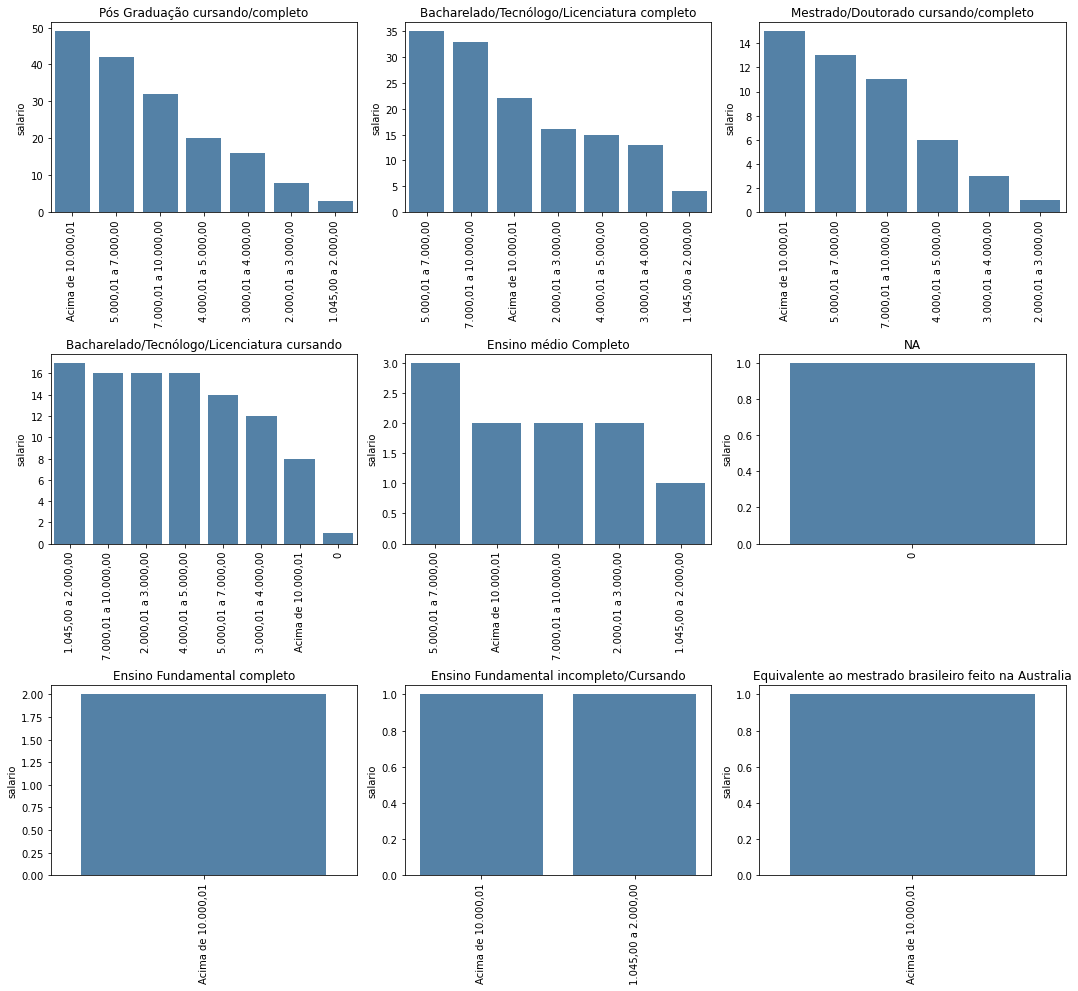

In [34]:
grafico(df, 'formacao', 15, 40, 9, 3)

## UF

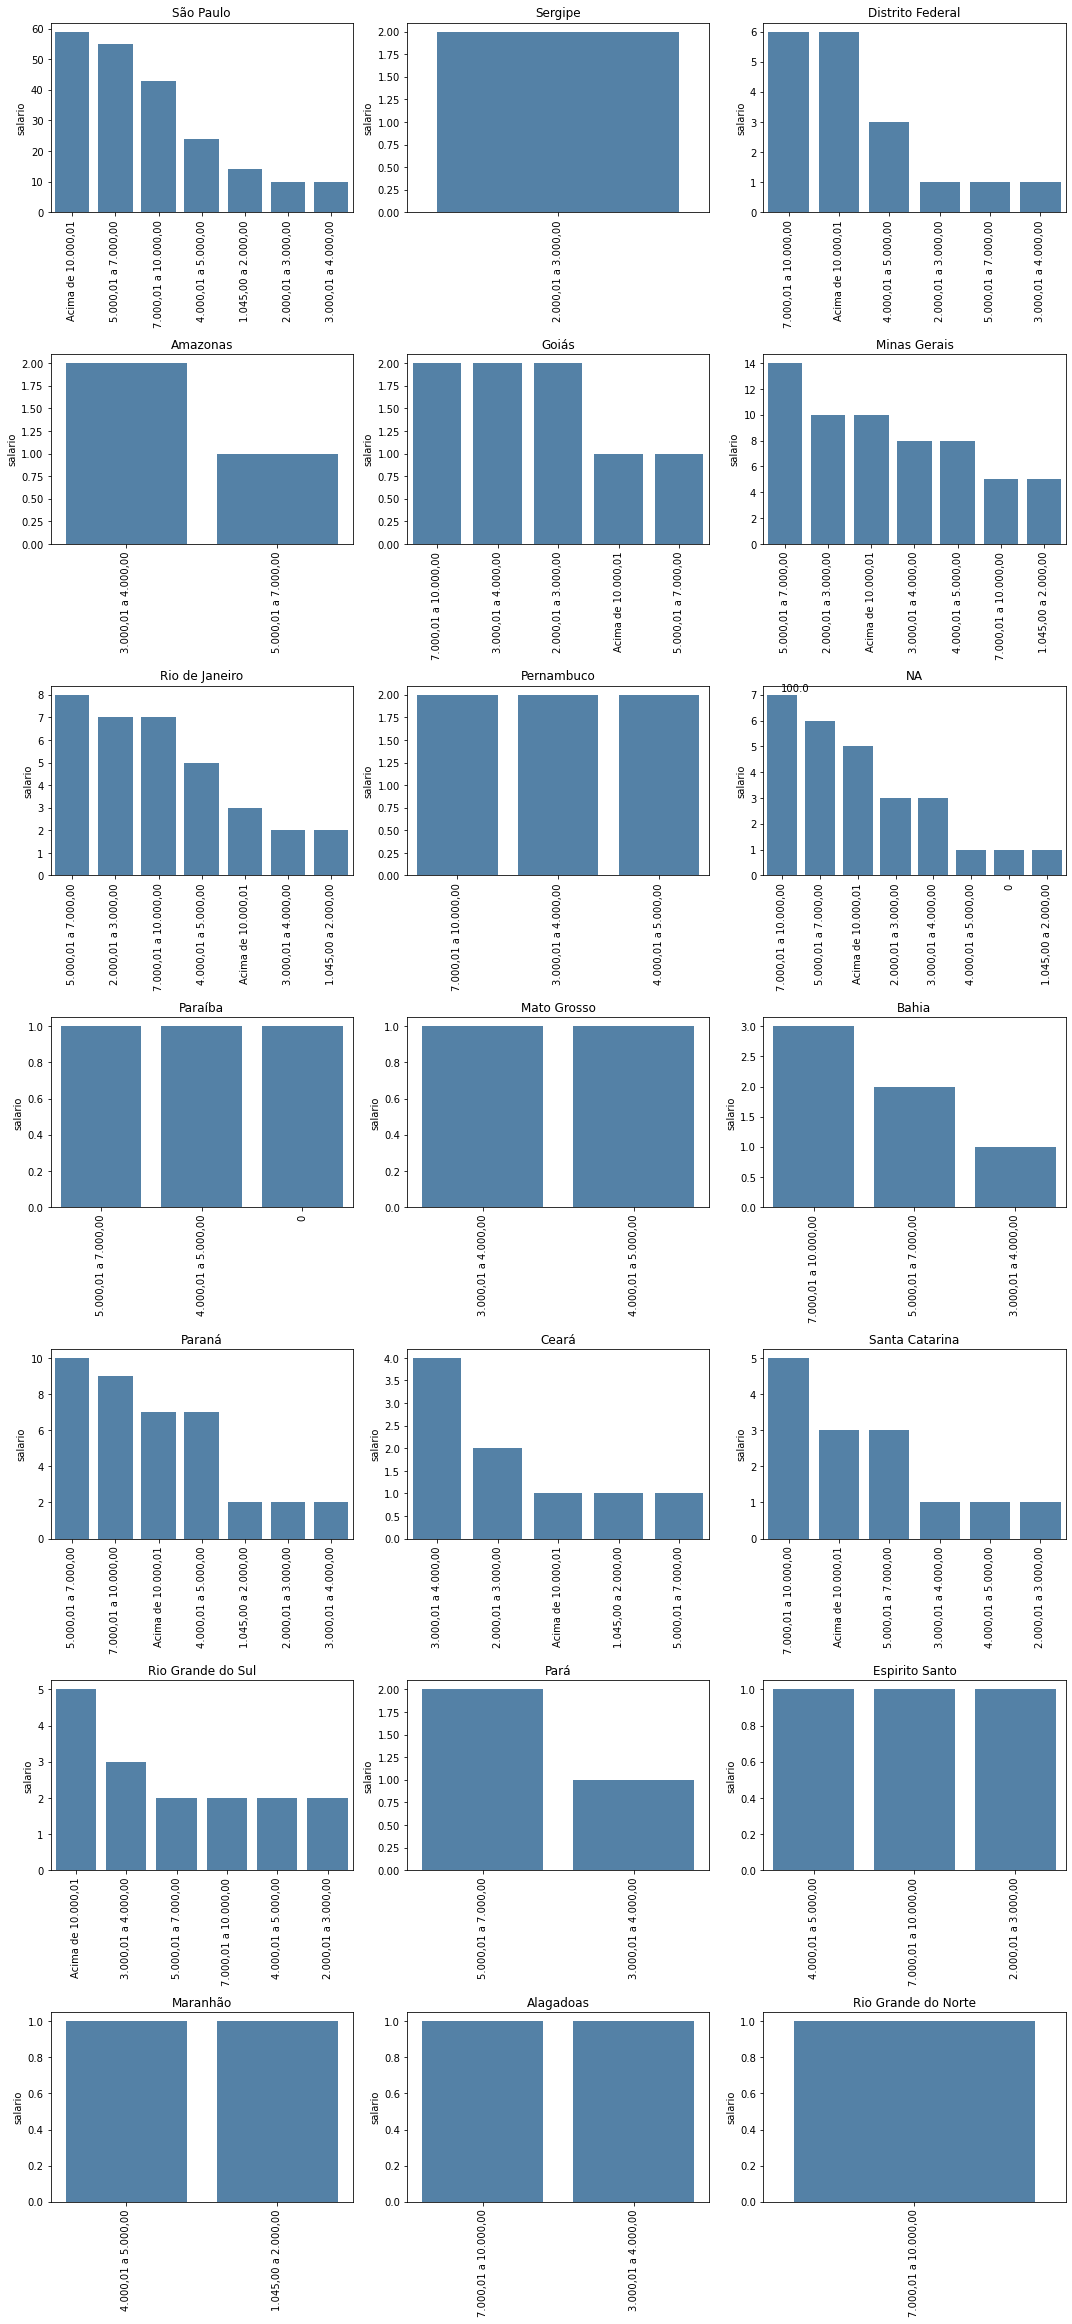

In [35]:
grafico(df, 'uf', 15, 40, 9, 3)

## OCUPAÇÃO

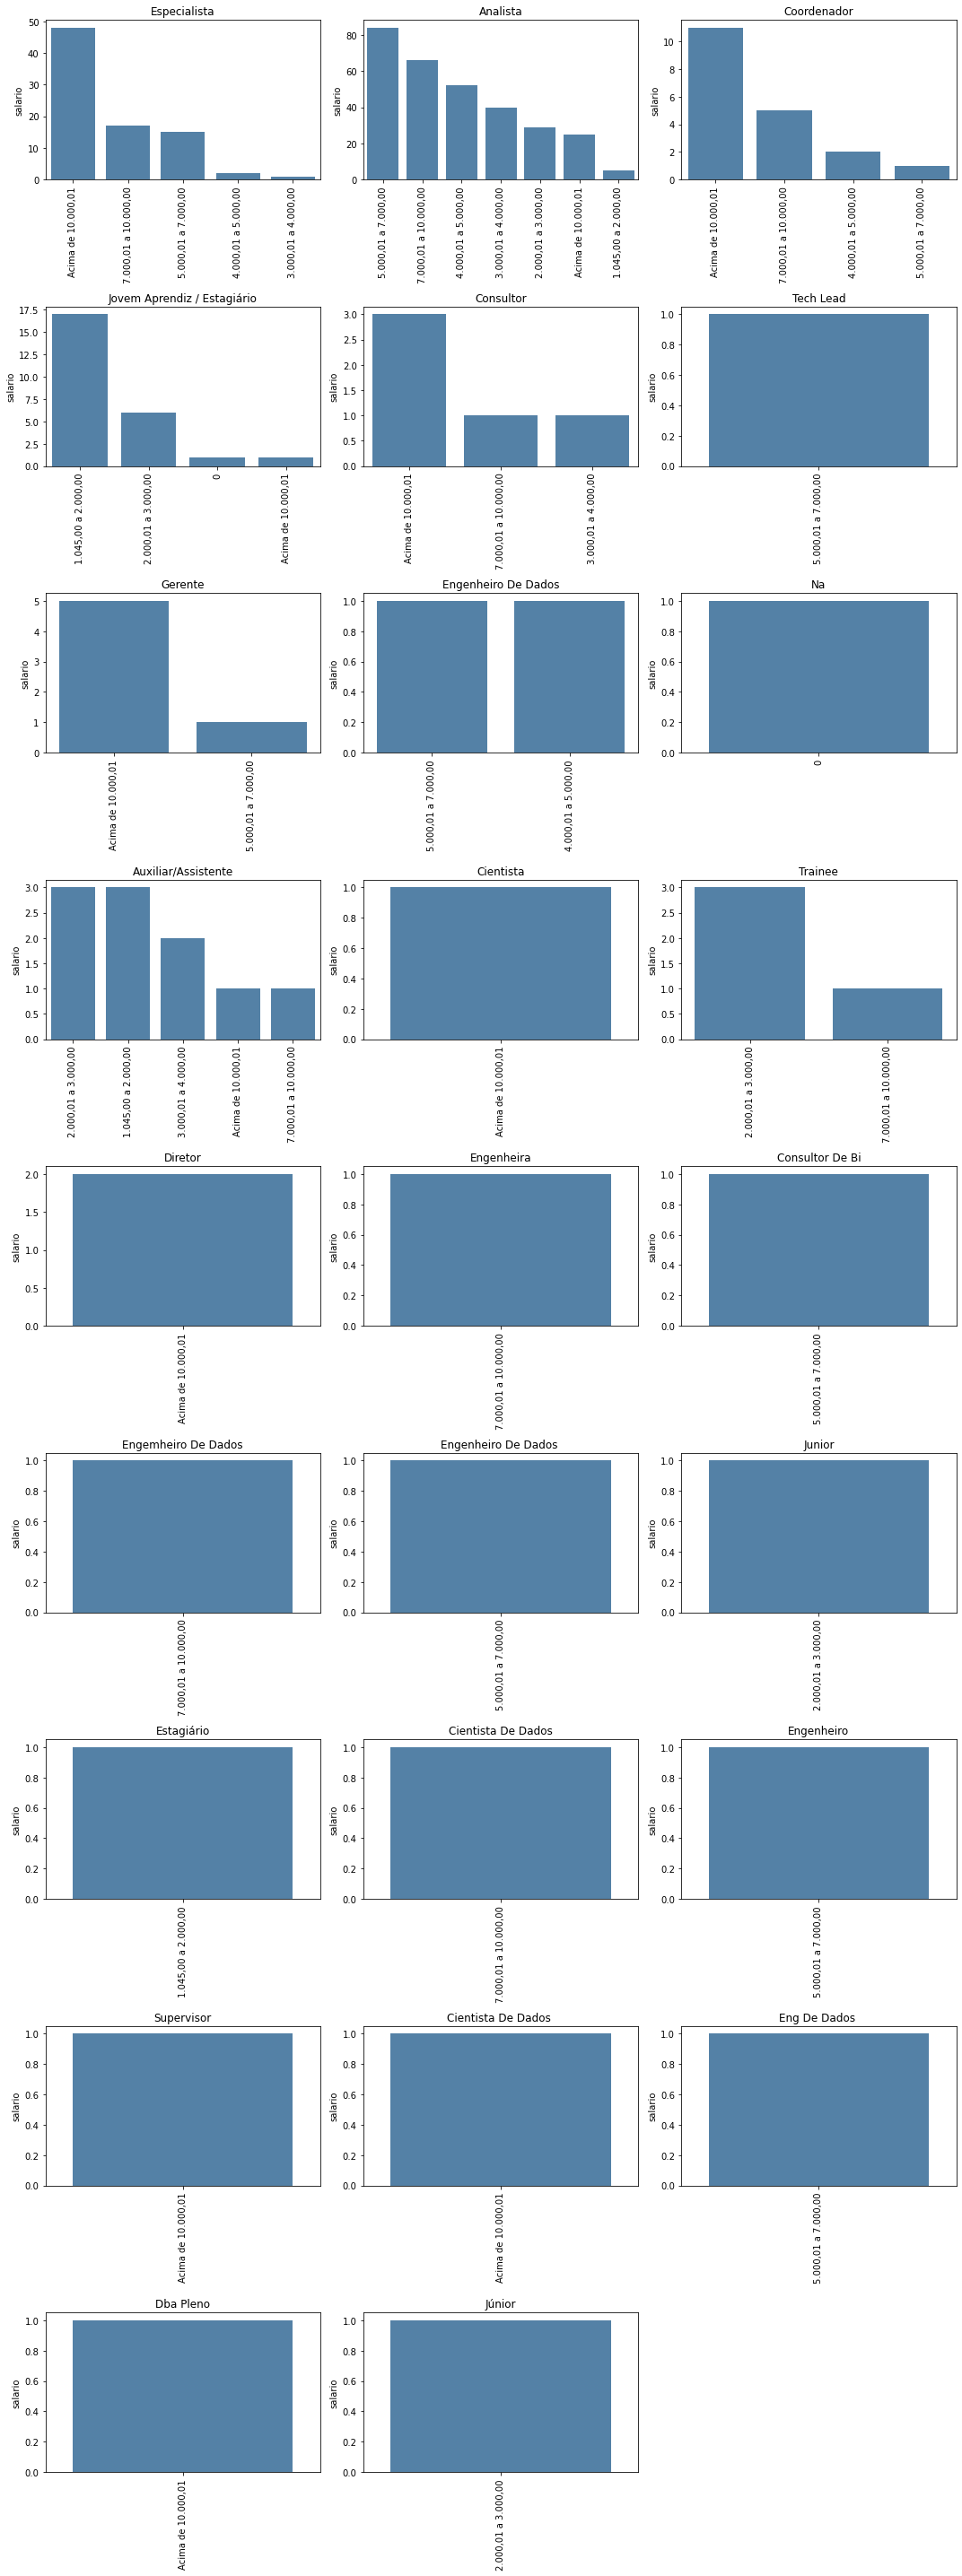

In [36]:
grafico(df, 'ocupacao', 15, 40, 9, 3)

## MODELO DE TRABALHO

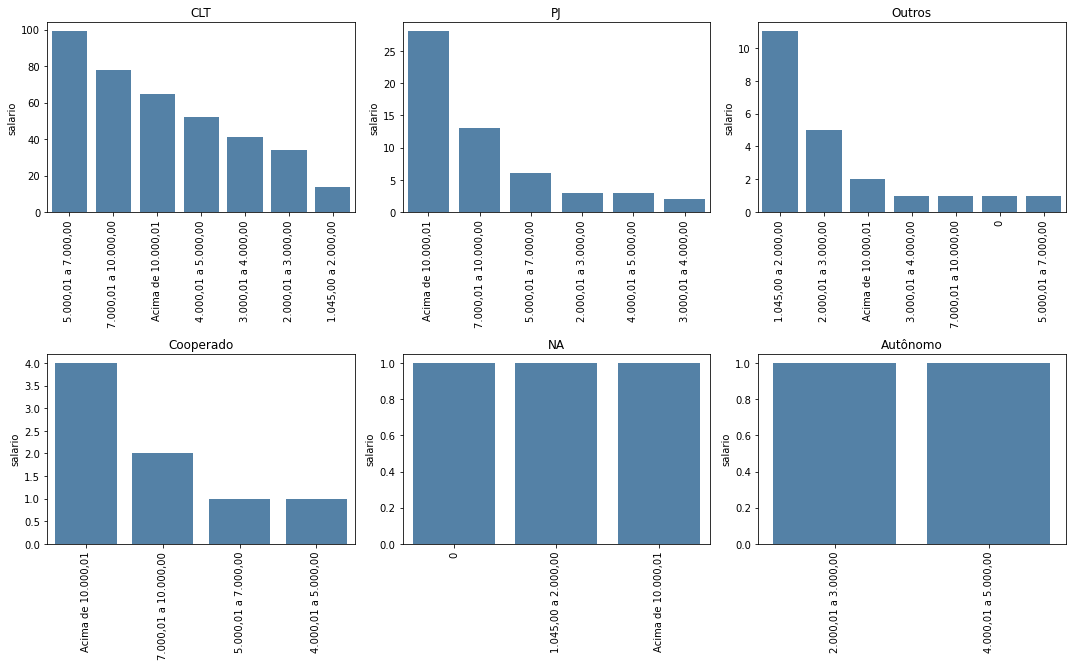

In [37]:
grafico(df, 'model_trab', 15, 40, 9, 3)

## QT. COLABORADORES

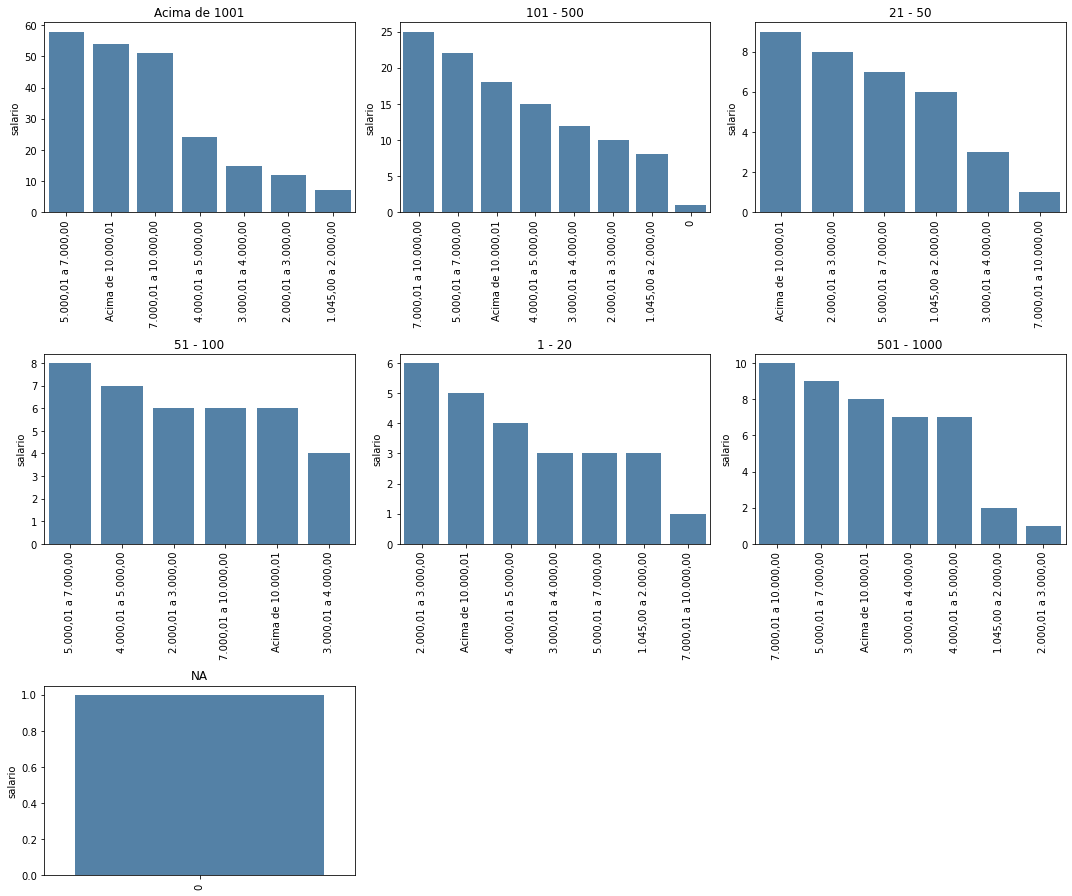

In [38]:
grafico(df, 'colab', 15, 40, 9, 3)

## SETOR

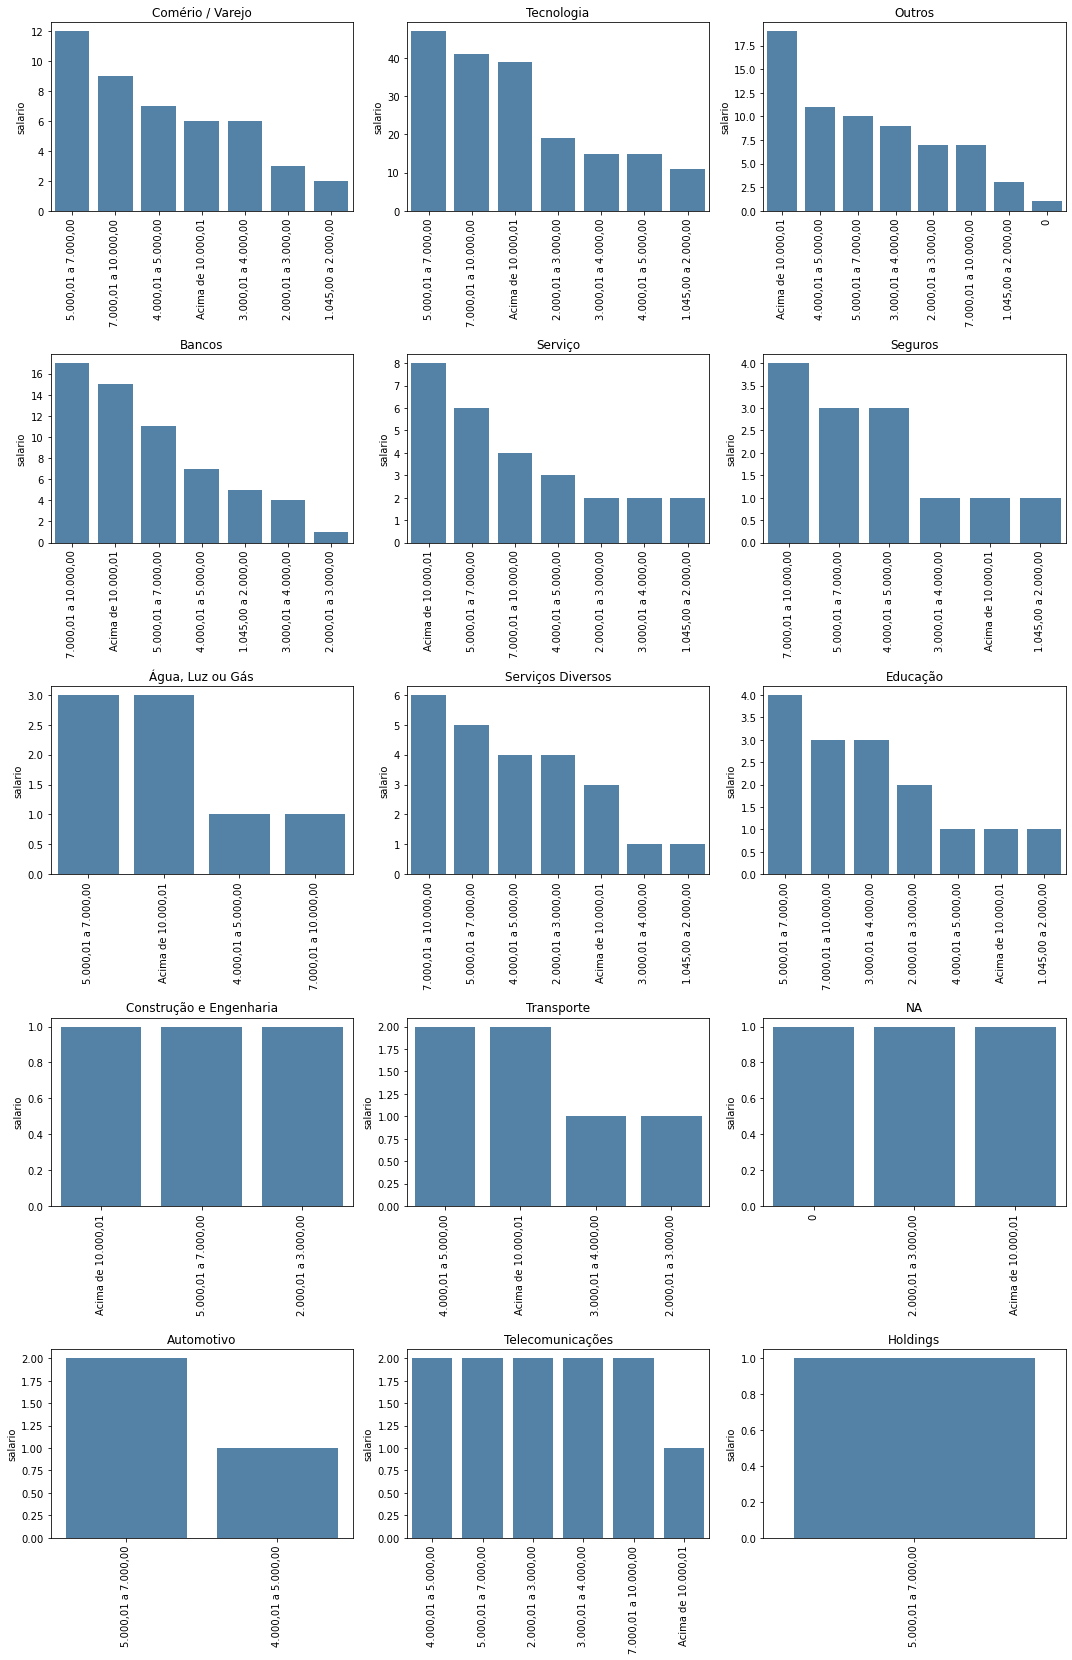

In [39]:
grafico(df, 'setor', 15, 40, 9, 3)